In [1]:
import pandas as pd

orders_data = pd.read_csv('./orders.csv') # orders
order_products__prior_data = pd.read_csv('./order_products__prior.csv') # order_products__prior
products_data = pd.read_csv('./products.csv') # products
aisles_data = pd.read_csv('./aisles.csv') # aisles
order_products__train_data = pd.read_csv('./order_products__train.csv') # order_products_train

new_orders = orders_data.drop(orders_data[orders_data['eval_set'] == 'test'].index, axis=0) # test drop한 orders

order_products_data = pd.merge(order_products__prior_data, order_products__train_data, how='outer') # prior + train

orders_products = pd.merge(order_products_data, new_orders, on='order_id') # orders + order_products

mean_prior_order_by_users = new_orders.groupby('user_id')['days_since_prior_order'].mean().round() # 구매주기 평균 구하기

In [2]:
# 이탈자 데이터 프레임 구하기

import numpy as np
churn_days = 21 # 이탈 구매 주기

mean_prior_order_by_users = pd.DataFrame(mean_prior_order_by_users)
mean_prior_order_by_users['days_since_prior_order'] = np.where(mean_prior_order_by_users['days_since_prior_order'] >= churn_days, True, False)
mean_prior_order_by_users.rename(columns={'days_since_prior_order':'churn'}, inplace=True)

In [3]:
# 평균 cart 제품에 따른 데이터 프레임 구하기

orders_products_count = orders_products.groupby('order_id').size()
orders_products_count = pd.DataFrame(orders_products_count)
orders_products_count = orders_products_count.rename(columns={0: 'carts'})
orders_products_count['carts'] = np.where(orders_products_count['carts'] >= 10, '평균 이상', '평균 이하') # 장바구니 평균 개수인 10개가 이상이라면 평균 이상, 아니면 평균 이하

p1 = pd.merge(orders_products, orders_products_count, on='order_id') # order_products와 join
p2 = pd.merge(p1, mean_prior_order_by_users, on='user_id') # 이탈 dataframe과 join

In [7]:
# churn이 True/False이면서 carts가 '평균 이하'/'평균 이상' 인 사용자 추출

filtered_users = p2[(p2['churn']) & (p2['carts'] == '평균 이하')] # 이탈자 이면서 평균이하
#filtered_users = p2[(p2['churn']== False) & (p2['carts'] == '평균 이하')] # 비이탈자이면서 평균이하

# 전체 사용자 수와 조건을 만족하는 사용자 수 계산
total_users = p2['user_id'].nunique()
filtered_users_count = filtered_users['user_id'].nunique()

# 비율 계산
ratio = filtered_users_count / total_users

print(f"Churn이 True이면서 carts가 '평균 이하'인 사용자의 비율: {ratio:.2%}")

Churn이 True이면서 carts가 '평균 이하'인 사용자의 비율: 84.99%


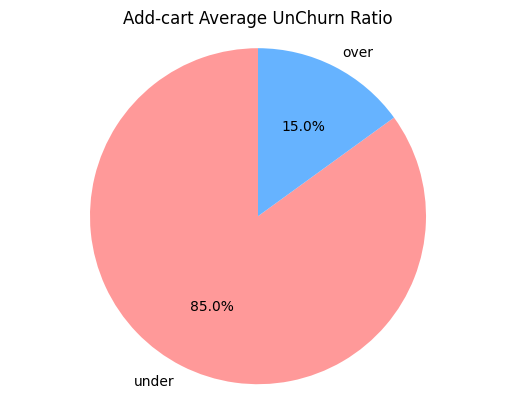

In [9]:
import matplotlib.pyplot as plt

labels = ['under', 'over']
sizes = [ratio, 1 - ratio]
colors = ['#ff9999','#66b3ff']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#plt.title('Add-cart Average Churn Ratio') # 이탈자
plt.title('Add-cart Average UnChurn Ratio') # 비이탈자
plt.show()

In [3]:
order_products_data = pd.merge(orders_products, products_data, on='product_id')

In [4]:
df = pd.merge(order_products_data, aisles_data, on='aisle_id')

In [5]:
df1 = pd.merge(mean_prior_order_by_users, df, on='user_id')

In [8]:
sort_churn_result = df1.sort_values(by=["user_id", "order_id"])
t = sort_churn_result.loc[: , ['order_id','user_id','product_name','aisle_id','aisle', 'churn']].set_index('user_id')
churned_rows = t[t['churn']]
unchurned_rows= t[t['churn']==False]
unchurned_rows

,order_id,product_name,aisle_id,aisle,churn
user_id,,,,,
1,431534,Bag of Organic Bananas,24,fresh fruits,False
1,431534,Bartlett Pears,24,fresh fruits,False
1,431534,Honeycrisp Apples,24,fresh fruits,False
1,431534,Organic Fuji Apples,24,fresh fruits,False
1,431534,Organic String Cheese,21,packaged cheese,False
...,...,...,...,...,...
206209,3154581,Fat Free Cream Cheese,108,other creams cheeses,False
206209,3154581,Raisins,117,nuts seeds dried fruit,False
206209,3154581,Organic Diced Tomatoes,81,canned jarred vegetables,False


In [41]:
unchurned_rows

,order_id,product_name,aisle_id,aisle,churn
user_id,,,,,
3,444309,Organic Baby Spinach,123,packaged vegetables fruits,False
3,444309,Unsweetened Chocolate Almond Breeze Almond Milk,91,soy lactosefree,False
3,444309,"Crackers, Crispy, Cheddar",78,crackers,False
3,444309,Organic Strawberries,24,fresh fruits,False
3,444309,100% Recycled Paper Towels,54,paper goods,False
...,...,...,...,...,...
206208,3412250,Sharp Cheddar Thick Slices Cheese,21,packaged cheese,False
206208,3412250,Triple Creme Goat Brie,21,packaged cheese,False
206208,3412250,Organic Garbanzo Beans,59,canned meals beans,False


In [9]:
aisle_counts = churned_rows['aisle'].value_counts().nlargest(10).reset_index(name='count')
aisle_counts2 = unchurned_rows['aisle'].value_counts().nlargest(10).reset_index(name='count')

In [10]:
aisle_counts

,aisle,count
0,fresh vegetables,65495
1,fresh fruits,61695
2,packaged vegetables fruits,32620
3,yogurt,25477
4,packaged cheese,21094
5,water seltzer sparkling water,19594
6,chips pretzels,16540
7,milk,14417
8,frozen meals,12204
9,soy lactosefree,11920


In [11]:
aisle_counts2

,aisle,count
0,fresh fruits,3730966
1,fresh vegetables,3503135
2,packaged vegetables fruits,1811186
3,yogurt,1482106
4,packaged cheese,1000368
5,milk,909242
6,water seltzer sparkling water,858556
7,chips pretzels,737199
8,soy lactosefree,652573
9,bread,596743


C:\Users\세양건설 공무\AppData\Local\Temp\ipykernel_20196\1781844246.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='aisle', data=aisle_counts, palette='viridis')


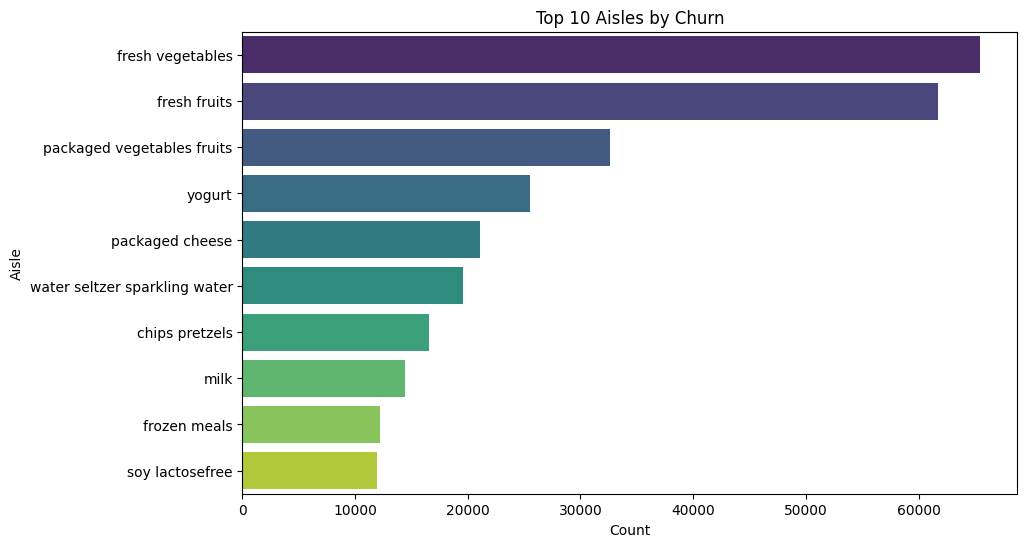

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='aisle', data=aisle_counts, palette='viridis')
plt.xlabel('Count')
plt.ylabel('Aisle')
plt.title('Top 10 Aisles by Churn')
plt.show()